# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [20]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/KK/KK_SW04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [21]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['type',
                                                        'id',
                                                        'lat',
                                                        'lon',
                                                        'brand',
                                                        'shop',
                                                        'addr:city', 
                                                        'addr:housenumber', 
                                                        'addr:postcode', 
                                                        'geometry', 
                                                        'index_right',
                                                        'bfs_name',
                                                        'bfs_number',
                                                        'pop',
                                                        'pop_dens',
                                                        'frg_pct',
                                                        'emp']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(20)

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0
8,node,48932835,47.375020,8.522895,Migros,supermarket,Zürich,7,8004.0,POINT (8.522895 47.37502),77,Zürich,261,420217,4778.994655,32.458468,491193.0
9,node,75749133,47.340967,8.530601,ALDI,supermarket,Zürich,81,8038.0,POINT (8.5306007 47.3409666),77,Zürich,261,420217,4778.994655,32.458468,491193.0
10,node,79977755,47.340070,8.530546,Coop,supermarket,Zürich,15,8038.0,POINT (8.5305461 47.3400698),77,Zürich,261,420217,4778.994655,32.458468,491193.0
11,node,83330862,47.344749,8.529981,Migros,supermarket,Zürich,3,8038.0,POINT (8.5299814 47.3447487),77,Zürich,261,420217,4778.994655,32.458468,491193.0
12,node,119249170,47.375255,8.536107,Migros,supermarket,Zürich,31-35,8001.0,POINT (8.5361073 47.3752549),77,Zürich,261,420217,4778.994655,32.458468,491193.0


### Filter Brands

In [22]:
pd.crosstab(df_orig['type'], df_orig['brand'])

brand,ALDI,Aldi,Alnatura,Coop,Denner,Globus,Jumbo,Landi,Lidl,Lidl Schweiz,Migros,Migros-Outlet,Rolog Krinner Cotub Titan Serac Molok,Spar,VOI,VOI Migros Partner,Volg,ZWIBOL
type,,,,,,,,,,,,,,,,,,
node,39,25,11,174,142,2,1,15,25,1,335,11,1,19,4,43,68,1


In [23]:
df = df_orig['brand'].value_counts()
df

brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Lidl                                      25
Aldi                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64

### Shape (number of rows and colums)

In [24]:
# Number of rows and columns
print(df.shape)

(18,)


### Data types

In [25]:
df.dtypes

dtype('int64')

### Barchart  Supermarkets

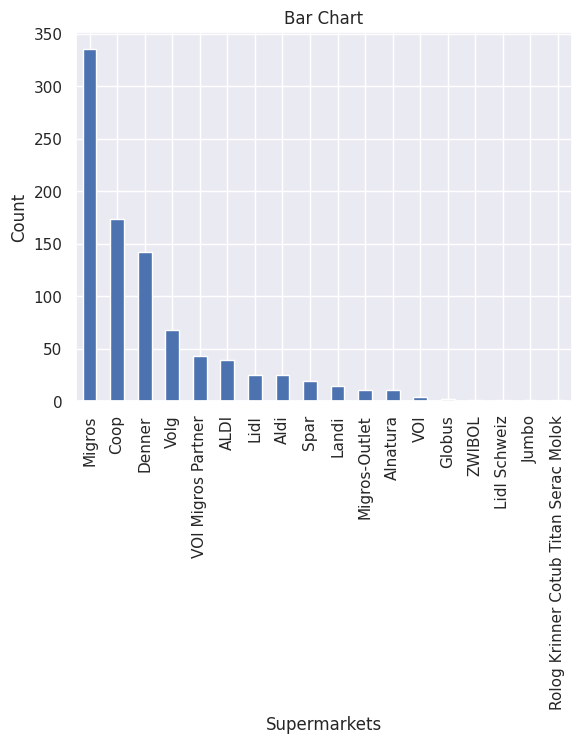

In [26]:
df.plot(x='Category', y='Value', kind='bar')
plt.xlabel('Supermarkets')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()

### Scatterplotmatrix

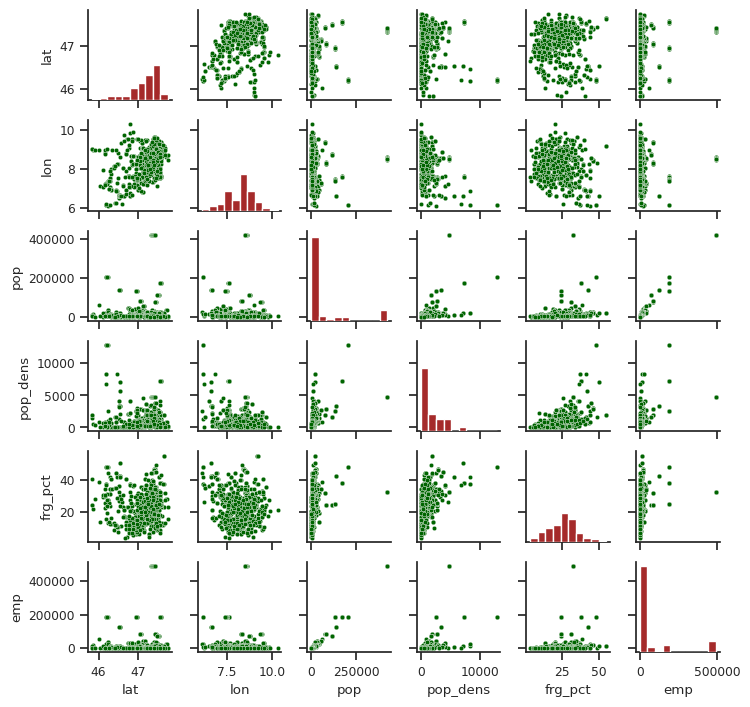

In [29]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df_orig[['lat', 
                     'lon', 
                     'pop', 
                     'pop_dens',
                     'frg_pct',
                     'emp']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Plot

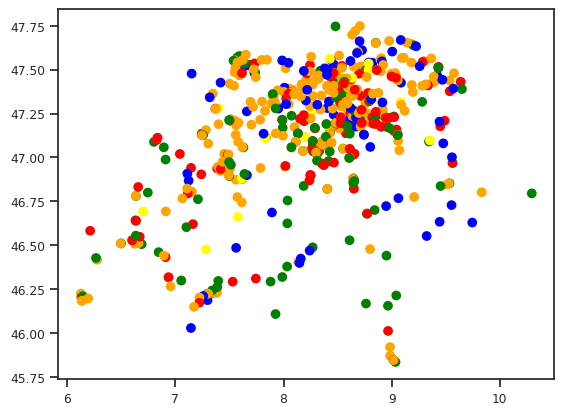

In [36]:
# Subset
df_sub = df_orig.loc[df_orig['brand'].isin(['Coop', 'Migros','Denner','Volg','Landi'])]
df_sub

# Colors
colors = {'Coop': 'green', 'Migros': "orange", "Denner": "red", "Volg": "blue", "Landi": "yellow"}

# Plot
plt.scatter(df_sub['lon'],
df_sub['lat'],
c=df_sub['brand'].map(colors))

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1014-azure
Datetime: 2023-10-13 16:16:00
Python Version: 3.10.13
-----------------------------------
